## [Pandas](https://pandas.pydata.org/) 소개

### [우리에게 필요한 Pandas 범위](http://pandas.pydata.org/pandas-docs/stable/getting_started/index.html) 

#### [Wes Mckinney](https://wesmckinney.com/) 가 만듬.  Numpy와 함께 데이터 처리에 많이 쓰임.  
#### Numpy가 homogeneous numerical array (가령, 원소들의 타입이 모두 같은 숫자형 배열) 에 최적화한데 비하여, Panda는 테이블 형태의 heterogeneous 데이터 처리를 하도록 만들어 짐  
#### Pandas는  `Series`와 `DataFrame` 두 가지 형태의 데이터 구조로 구성
- Series ; 1D labeled homogeneously-typed array
- DataFrame : General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed column

Pandas 특징 :

- A fast and efficient DataFrame object for data manipulation with integrated indexing;
- Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;
- Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;
- Flexible reshaping and pivoting of data sets;
- Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
- Columns can be inserted and deleted from data structures for size mutability;
- Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;
- High performance merging and joining of data sets;
- Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
- Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
- Highly optimized for performance, with critical code paths written in Cython or C.
- Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.

#### 주요 학습 자료 : 공부할 수 있는 좋은 자료 무지 많습니다.  
- [Official Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/) & [Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
  - [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html) 
  - [Pandas Data Structures](http://pandas.pydata.org/pandas-docs/stable/dsintro.html)
  - [Pandas Cookbook](http://pandas.pydata.org/pandas-docs/stable/tutorials.html#pandas-cookbook)와 그 [Github](https://github.com/jvns/pandas-cookbook)
- ["Python for Data Analysis" by Wes McKinney 의 GitHub](https://github.com/wesm/pydata-book)
- [Jake VanderPlas의 Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) & [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook)

### 아래 노트북은  [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html) 를 기반하여 작성됨

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

In [379]:
import pandas as pd    # 보통 이처럼 pandas 패키지를 import 
import numpy as np
import matplotlib.pyplot as plt 

# matplotlib 시각화 출력을 주피터 노트북에 삽입토록 
%matplotlib inline   

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

### Series : 1차원 배열 (Numpy의 벡터와 유사한)로서 index를 갖고 있음 
A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [380]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Since we did not specify an index for the data, a default one consisting of the integers 0 through N - 1 (where N is the length of the data) is created.   

In [381]:
s.values

array([ 1.,  3.,  5., nan,  6.,  8.])

In [382]:
type(s.values)   # value 값이 ndarray

numpy.ndarray

In [383]:
s.index

RangeIndex(start=0, stop=6, step=1)

In [384]:
pd.isnull(s)   # Series나 DataFrame에서의 NaN(not a number, 결측치) 찾음. 

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

In [385]:
s2 = pd. Series([4, 7, - 5, 3], index=['d' , 'b' , 'a' , 'c' ])
print(s2)
print(s2.index)

d    4
b    7
a   -5
c    3
dtype: int64
Index(['d', 'b', 'a', 'c'], dtype='object')


index 레이블을 이용해 Series의 값을 선택

In [386]:
s2['b']

7

In [387]:
s2[1:3]   # 이런 slicing 도 가능 

b    7
a   -5
dtype: int64

In [388]:
s2[['a','d', 'd', 'c']]

a   -5
d    4
d    4
c    3
dtype: int64

Numpy와 유사한 operation - Boolean array를 써 filtering, vectorized 연산 등 ...

In [389]:
s2 > 0

d     True
b     True
a    False
c     True
dtype: bool

In [390]:
s2[s2 > 0]

d    4
b    7
c    3
dtype: int64

In [391]:
s2 * 2

d     8
b    14
a   -10
c     6
dtype: int64

In [392]:
s2 ** 2

d    16
b    49
a    25
c     9
dtype: int64

In [393]:
np.exp(s2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

**Python dictionary를 써서 Series 생성 가능** 

In [394]:
dic1 =  {'hong': 173, 'kim':181, 'lee':166}
s2 = pd.Series(dic1)
s2

hong    173
kim     181
lee     166
dtype: int64

In [395]:
'kim' in dic1

True

In [396]:
"jane" in dic1

False

In [397]:
'kism' in s2

False

### DataFrame : (데이터베이스의) 테이블과 같은 데이터 구조로, 다수의 열(column)으로 구성될 수 있다.  각 열들은 다른 데이터 타입일 수 있음 (즉, 어떤 열은 숫자, 다른 열은 문자열 ... )
A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index
#### Dictionary로 DataFrame 만들기  

In [398]:
data = {'state' : ['Ohio' , 'Ohio' , 'Ohio' , 'Nevada' , 'Nevada' , 'Nevada' ],
 'year' : [2000, 2001, 2002, 2001, 2002, 2003],
 'pop' : [1.5, 1.7, 3.6, 2.4, 2.9, 3.2],
  'scale': 1}
frame = pd. DataFrame(data)
frame

,state,year,pop,scale
0,Ohio,2000,1.5,1
1,Ohio,2001,1.7,1
2,Ohio,2002,3.6,1
3,Nevada,2001,2.4,1
4,Nevada,2002,2.9,1
5,Nevada,2003,3.2,1


In [399]:
frame.values     # dataframe의 내부 값들이 ndarray 

array([['Ohio', 2000, 1.5, 1],
       ['Ohio', 2001, 1.7, 1],
       ['Ohio', 2002, 3.6, 1],
       ['Nevada', 2001, 2.4, 1],
       ['Nevada', 2002, 2.9, 1],
       ['Nevada', 2003, 3.2, 1]], dtype=object)

**Column 명과 index 명을 주기**  
Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:  


In [400]:
dates = pd.date_range('20130101', periods=6)   # index 명으로 사용
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [401]:
np.random.seed(42)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304
2013-01-06,1.465649,-0.225776,0.067528,-1.424748


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [402]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(5)),dtype='float32'),
                   'D':np.array([3]*5,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train", "koo"]),
                   'F':'foo'})

In [403]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo
4,1.0,2013-01-02,1.0,3,koo,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [404]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [405]:
# df2.<TAB>

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [406]:
df.head()

,A,B,C,D
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304


In [407]:
df.tail(3)

,A,B,C,D
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304
2013-01-06,1.465649,-0.225776,0.067528,-1.424748


Display the index, columns, and the underlying numpy data

In [408]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [409]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [410]:
df.values

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
       [-0.23415337, -0.23413696,  1.57921282,  0.76743473],
       [-0.46947439,  0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783, -0.56228753],
       [-1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819]])

Describe shows a quick statistic summary of your data

In [411]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.081311,-0.275775,-0.133655,-0.262434
std,0.861950,0.862828,1.168366,1.187681
min,-1.012831,-1.913280,-1.724918,-1.424748
25%,-0.410644,-0.232047,-0.796872,-1.199800
50%,0.003904,-0.182020,-0.197945,-0.514009
75%,0.433026,0.201119,0.502648,0.459144
max,1.465649,0.542560,1.579213,1.523030


Transposing your data

In [412]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.496714,-0.234153,-0.469474,0.241962,-1.012831,1.465649
B,-0.138264,-0.234137,0.542560,-1.913280,0.314247,-0.225776
C,0.647689,1.579213,-0.463418,-1.724918,-0.908024,0.067528
D,1.523030,0.767435,-0.465730,-0.562288,-1.412304,-1.424748


Sorting by an axis

In [413]:
df

,A,B,C,D
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304
2013-01-06,1.465649,-0.225776,0.067528,-1.424748


In [414]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.523030,0.647689,-0.138264,0.496714
2013-01-02,0.767435,1.579213,-0.234137,-0.234153
2013-01-03,-0.465730,-0.463418,0.542560,-0.469474
2013-01-04,-0.562288,-1.724918,-1.913280,0.241962
2013-01-05,-1.412304,-0.908024,0.314247,-1.012831
2013-01-06,-1.424748,0.067528,-0.225776,1.465649


Sorting by value

In [415]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-06,1.465649,-0.225776,0.067528,-1.424748
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, ***.loc, .iloc*** and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

In [416]:
df

,A,B,C,D
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304
2013-01-06,1.465649,-0.225776,0.067528,-1.424748


Selecting a single column, which yields a Series, equivalent to df.A

In [417]:
df['A']    # df.A 와 같음 

2013-01-01    0.496714
2013-01-02   -0.234153
2013-01-03   -0.469474
2013-01-04    0.241962
2013-01-05   -1.012831
2013-01-06    1.465649
Freq: D, Name: A, dtype: float64

Numpy의 ndarray와 Pandas 데이터프레임과의 관계:

In [418]:
print(df.A.shape)    # ndarray에서와 같이 Series, DataFrame 객체도 `shape` 가능 
print(type(df['A']))
print(type(df.A.values))
print(df.A.values.shape)
df.A.values

(6,)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
(6,)


array([ 0.49671415, -0.23415337, -0.46947439,  0.24196227, -1.01283112,
        1.46564877])

Selecting via [], which slices the rows.

In [419]:
df

,A,B,C,D
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304
2013-01-06,1.465649,-0.225776,0.067528,-1.424748


In [420]:
df[0:3]    # 기본 숫자형 index로 슬라이싱 

,A,B,C,D
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730


In [421]:
df['20130102':'20130104']    # 레이블 인덱스로 슬라이싱.  '20130104' 가 포함됨 

,A,B,C,D
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288


### Selection by Label

See more in [Selection by Label](http://pandas.pydata.org/pandas-docs/stable/indexing.html#selection-by-label)   

When slicing, **both the start bound AND the stop bound are included,** if present in the index. Integers are valid labels, but they refer to the label and not the position

In [422]:
df

,A,B,C,D
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304
2013-01-06,1.465649,-0.225776,0.067528,-1.424748


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 400.0 bytes


For getting a cross section using a label

Selection by Label

In [424]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.496714,-0.138264
2013-01-02,-0.234153,-0.234137
2013-01-03,-0.469474,0.542560
2013-01-04,0.241962,-1.913280
2013-01-05,-1.012831,0.314247
2013-01-06,1.465649,-0.225776


In [425]:
df.loc[:, ('B', 'B', 'A')]

,B,B,A
2013-01-01,-0.138264,-0.138264,0.496714
2013-01-02,-0.234137,-0.234137,-0.234153
2013-01-03,0.542560,0.542560,-0.469474
2013-01-04,-1.913280,-1.913280,0.241962
2013-01-05,0.314247,0.314247,-1.012831
2013-01-06,-0.225776,-0.225776,1.465649


Showing label slicing, both endpoints are included

In [426]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.234153,-0.234137
2013-01-03,-0.469474,0.542560
2013-01-04,0.241962,-1.913280


Reduction in the dimensions of the returned object

In [427]:
df.loc['20130102',['A','B']]

A   -0.234153
B   -0.234137
Name: 2013-01-02 00:00:00, dtype: float64

In [428]:
df.loc['20130102',['A','B']].shape

(2,)

For getting a scalar value

In [429]:
df.loc[dates[0],'A']

0.4967141530112327

### Selection by Position - iloc를 써서...

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [430]:
df

,A,B,C,D
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304
2013-01-06,1.465649,-0.225776,0.067528,-1.424748


In [431]:
df.iloc[3]    

A    0.241962
B   -1.913280
C   -1.724918
D   -0.562288
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [432]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.241962,-1.913280
2013-01-05,-1.012831,0.314247


By lists of integer position locations, similar to the numpy/python style

In [433]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.234153,1.579213
2013-01-03,-0.469474,-0.463418
2013-01-05,-1.012831,-0.908024


For slicing rows explicitly

In [434]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730


For slicing columns explicitly

In [435]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.138264,0.647689
2013-01-02,-0.234137,1.579213
2013-01-03,0.542560,-0.463418
2013-01-04,-1.913280,-1.724918
2013-01-05,0.314247,-0.908024
2013-01-06,-0.225776,0.067528


For getting a value explicitly

In [436]:
df.iloc[1,1]

-0.23413695694918055

## Boolean Indexing

Using a single column’s values to select data.

In [437]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288
2013-01-06,1.465649,-0.225776,0.067528,-1.424748


A where operation for getting.

In [438]:
df

,A,B,C,D
2013-01-01,0.496714,-0.138264,0.647689,1.523030
2013-01-02,-0.234153,-0.234137,1.579213,0.767435
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304
2013-01-06,1.465649,-0.225776,0.067528,-1.424748


In [439]:
df[df > 0]

,A,B,C,D
2013-01-01,0.496714,NaN,0.647689,1.523030
2013-01-02,NaN,NaN,1.579213,0.767435
2013-01-03,NaN,0.542560,NaN,NaN
2013-01-04,0.241962,NaN,NaN,NaN
2013-01-05,NaN,0.314247,NaN,NaN
2013-01-06,1.465649,NaN,0.067528,NaN


Using the isin() method for filtering:

In [440]:
df2 = df.copy()

In [441]:
df2['E'] = ['one','one', 'two','three','four','three']

In [442]:
df2

,A,B,C,D,E
2013-01-01,0.496714,-0.138264,0.647689,1.523030,one
2013-01-02,-0.234153,-0.234137,1.579213,0.767435,one
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730,two
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288,three
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304,four
2013-01-06,1.465649,-0.225776,0.067528,-1.424748,three


In [443]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [444]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730,two
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [445]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [446]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [447]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.496714,-0.138264,0.647689,1.523030,NaN
2013-01-02,-0.234153,-0.234137,1.579213,0.767435,1.0
2013-01-03,-0.469474,0.542560,-0.463418,-0.465730,2.0
2013-01-04,0.241962,-1.913280,-1.724918,-0.562288,3.0
2013-01-05,-1.012831,0.314247,-0.908024,-1.412304,4.0
2013-01-06,1.465649,-0.225776,0.067528,-1.424748,5.0


Setting values by label

In [448]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [449]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [450]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [451]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.647689,5,NaN
2013-01-02,-0.234153,-0.234137,1.579213,5,1.0
2013-01-03,-0.469474,0.542560,-0.463418,5,2.0
2013-01-04,0.241962,-1.913280,-1.724918,5,3.0
2013-01-05,-1.012831,0.314247,-0.908024,5,4.0
2013-01-06,1.465649,-0.225776,0.067528,5,5.0


In [452]:
len(df)

6

A where operation with setting.

In [453]:
df2 = df.copy()

In [454]:
df2[df2 > 0] = -df2

In [456]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.647689,-5,NaN
2013-01-02,-0.234153,-0.234137,-1.579213,-5,-1.0
2013-01-03,-0.469474,-0.542560,-0.463418,-5,-2.0
2013-01-04,-0.241962,-1.913280,-1.724918,-5,-3.0
2013-01-05,-1.012831,-0.314247,-0.908024,-5,-4.0
2013-01-06,-1.465649,-0.225776,-0.067528,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. [Missing Data section](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) 참고 

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [458]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.647689,5,NaN
2013-01-02,-0.234153,-0.234137,1.579213,5,1.0
2013-01-03,-0.469474,0.542560,-0.463418,5,2.0
2013-01-04,0.241962,-1.913280,-1.724918,5,3.0
2013-01-05,-1.012831,0.314247,-0.908024,5,4.0
2013-01-06,1.465649,-0.225776,0.067528,5,5.0


In [459]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [460]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.647689,5,NaN,NaN
2013-01-02,-0.234153,-0.234137,1.579213,5,1.0,NaN
2013-01-03,-0.469474,0.542560,-0.463418,5,2.0,NaN
2013-01-04,0.241962,-1.913280,-1.724918,5,3.0,NaN


In [461]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [462]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.647689,5,NaN,1.0
2013-01-02,-0.234153,-0.234137,1.579213,5,1.0,1.0
2013-01-03,-0.469474,0.542560,-0.463418,5,2.0,NaN
2013-01-04,0.241962,-1.913280,-1.724918,5,3.0,NaN


To drop any rows that have missing data.

In [464]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.234153,-0.234137,1.579213,5,1.0,1.0


Filling missing data

In [465]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.647689,5,5.0,1.0
2013-01-02,-0.234153,-0.234137,1.579213,5,1.0,1.0
2013-01-03,-0.469474,0.542560,-0.463418,5,2.0,5.0
2013-01-04,0.241962,-1.913280,-1.724918,5,3.0,5.0


To get the boolean mask where values are nan

In [466]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [467]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.647689,5,NaN
2013-01-02,-0.234153,-0.234137,1.579213,5,1.0
2013-01-03,-0.469474,0.542560,-0.463418,5,2.0
2013-01-04,0.241962,-1.913280,-1.724918,5,3.0
2013-01-05,-1.012831,0.314247,-0.908024,5,4.0
2013-01-06,1.465649,-0.225776,0.067528,5,5.0


In [469]:
df.mean()

A   -0.001475
B   -0.252731
C   -0.133655
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [471]:
df.mean(axis=1)

2013-01-01    1.411922
2013-01-02    1.422184
2013-01-03    1.321934
2013-01-04    0.920753
2013-01-05    1.478678
2013-01-06    2.261480
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [473]:
# shift : 이동 
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [474]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

### Apply

Applying functions to the data

In [475]:
df.apply(np.cumsum)    # axis=0  by default.  

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.647689,5,NaN
2013-01-02,-0.234153,-0.234137,2.226901,10,1.0
2013-01-03,-0.703628,0.308423,1.763484,15,3.0
2013-01-04,-0.461665,-1.604857,0.038566,20,6.0
2013-01-05,-1.474497,-1.290610,-0.869458,25,10.0
2013-01-06,-0.008848,-1.516386,-0.801930,30,15.0


In [477]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.647689,5,NaN
2013-01-02,-0.234153,-0.234137,1.579213,5,1.0
2013-01-03,-0.469474,0.542560,-0.463418,5,2.0
2013-01-04,0.241962,-1.913280,-1.724918,5,3.0
2013-01-05,-1.012831,0.314247,-0.908024,5,4.0
2013-01-06,1.465649,-0.225776,0.067528,5,5.0


In [476]:
df.apply(lambda x: x.max() - x.min())

A    2.478480
B    2.455840
C    3.304131
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [478]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [479]:
s

0    0
1    2
2    4
3    2
4    6
5    4
6    0
7    6
8    1
9    3
dtype: int32

In [480]:
s.value_counts()

6    2
4    2
2    2
0    2
3    1
1    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [481]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [482]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [483]:
df = pd.DataFrame(np.random.randn(10, 4))

In [484]:
df

,0,1,2,3
0,0.095126,0.664654,-0.140218,-0.033193
1,-0.749077,-0.778382,0.948843,1.580851
2,-0.368171,0.375565,-1.193158,-0.409052
3,-0.446741,1.524242,0.323000,-1.393417
4,-2.178334,-1.043896,0.172694,0.324199
5,0.745860,-1.836583,0.564464,0.025501
6,0.473193,0.659191,2.340746,1.070985
7,0.096416,0.419102,-0.953028,-1.047871
8,-1.875677,-1.366782,0.636305,-0.906721
9,0.476043,1.303661,0.211587,0.597045


In [485]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.095126  0.664654 -0.140218 -0.033193
 1 -0.749077 -0.778382  0.948843  1.580851
 2 -0.368171  0.375565 -1.193158 -0.409052,
           0         1         2         3
 3 -0.446741  1.524242  0.323000 -1.393417
 4 -2.178334 -1.043896  0.172694  0.324199
 5  0.745860 -1.836583  0.564464  0.025501
 6  0.473193  0.659191  2.340746  1.070985,
           0         1         2         3
 7  0.096416  0.419102 -0.953028 -1.047871
 8 -1.875677 -1.366782  0.636305 -0.906721
 9  0.476043  1.303661  0.211587  0.597045]

In [486]:
pd.concat(pieces)

,0,1,2,3
0,0.095126,0.664654,-0.140218,-0.033193
1,-0.749077,-0.778382,0.948843,1.580851
2,-0.368171,0.375565,-1.193158,-0.409052
3,-0.446741,1.524242,0.323000,-1.393417
4,-2.178334,-1.043896,0.172694,0.324199
5,0.745860,-1.836583,0.564464,0.025501
6,0.473193,0.659191,2.340746,1.070985
7,0.096416,0.419102,-0.953028,-1.047871
8,-1.875677,-1.366782,0.636305,-0.906721
9,0.476043,1.303661,0.211587,0.597045


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [487]:
left = pd.DataFrame({'key': ['foo', 'kat'], 'lval': [1, 2]})

In [488]:
right = pd.DataFrame({'key': ['foo', 'kat'], 'rval': [4, 5]})

In [489]:
left

,key,lval
0,foo,1
1,kat,2


In [490]:
right

,key,rval
0,foo,4
1,kat,5


In [491]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,kat,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [492]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [493]:
df

,A,B,C,D
0,-0.896335,-0.111988,1.468941,-1.123898
1,0.950005,1.726516,0.457885,-1.684287
2,0.326845,-0.081119,0.467795,0.736122
3,-0.779702,-0.843896,-0.150534,-0.965558
4,0.150489,-0.113421,2.633528,-1.025091
5,-0.782048,0.423943,0.872705,2.287226
6,1.622920,0.823733,0.293059,0.896630
7,-0.610322,-0.316166,-1.482424,-0.228848


In [496]:
s = df.iloc[3]
s

A   -0.779702
B   -0.843896
C   -0.150534
D   -0.965558
Name: 3, dtype: float64

In [497]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.896335,-0.111988,1.468941,-1.123898
1,0.950005,1.726516,0.457885,-1.684287
2,0.326845,-0.081119,0.467795,0.736122
3,-0.779702,-0.843896,-0.150534,-0.965558
4,0.150489,-0.113421,2.633528,-1.025091
5,-0.782048,0.423943,0.872705,2.287226
6,1.622920,0.823733,0.293059,0.896630
7,-0.610322,-0.316166,-1.482424,-0.228848
8,-0.779702,-0.843896,-0.150534,-0.965558


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [498]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [501]:
df

,A,B,C,D
0,foo,one,0.962641,-0.870305
1,bar,one,-0.209692,-0.506643
2,foo,two,-0.774043,-1.309951
3,bar,three,-0.359778,2.943663
4,foo,two,0.724083,-1.096266
5,bar,two,-0.255765,0.914884
6,foo,one,0.849921,-0.666061
7,foo,three,-1.311324,-0.513787


Grouping and then applying a function sum to the resulting groups.

In [502]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.825235,3.351905
foo,0.451279,-4.456370


In [503]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.209692 -0.506643
    three -0.359778  2.943663
    two   -0.255765  0.914884
foo one    1.812562 -1.536366
    three -1.311324 -0.513787
    two   -0.049960 -2.406216

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [504]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [505]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [506]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [507]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [508]:
df

A         B
first second                    
bar   one     0.301323 -1.458517
      two    -0.662738 -0.146473
baz   one    -0.846017 -0.822489
      two     1.086727  1.004987
foo   one    -0.441766 -0.084165
      two     1.237016 -1.426479
qux   one     0.338023  1.974571
      two     1.965035 -1.939911

In [509]:
df2 = df[:4]

In [510]:
df2

A         B
first second                    
bar   one     0.301323 -1.458517
      two    -0.662738 -0.146473
baz   one    -0.846017 -0.822489
      two     1.086727  1.004987

The stack() method “compresses” a level in the DataFrame’s columns.

In [511]:
stacked = df2.stack()

In [512]:
stacked

first  second   
bar    one     A    0.301323
               B   -1.458517
       two     A   -0.662738
               B   -0.146473
baz    one     A   -0.846017
               B   -0.822489
       two     A    1.086727
               B    1.004987
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [513]:
stacked.unstack()

A         B
first second                    
bar   one     0.301323 -1.458517
      two    -0.662738 -0.146473
baz   one    -0.846017 -0.822489
      two     1.086727  1.004987

In [514]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.301323 -0.662738
      B -1.458517 -0.146473
baz   A -0.846017  1.086727
      B -0.822489  1.004987

In [515]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.301323 -0.846017
       B -1.458517 -0.822489
two    A -0.662738  1.086727
       B -0.146473  1.004987

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [516]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [518]:
df

,A,B,C,D,E
0,one,A,foo,-0.762627,0.789673
1,one,B,foo,0.168659,0.431489
2,two,C,foo,-1.321877,-1.096752
3,three,A,bar,-0.668247,-0.682302
4,one,B,bar,-0.137291,0.887512
5,one,C,bar,1.401322,0.605483
6,two,A,foo,-0.045403,-0.720298
7,three,B,foo,0.216937,-0.269934
8,one,C,foo,0.512424,-0.143462
9,one,A,bar,0.543489,0.617004


We can produce pivot tables from this data very easily:

In [519]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.543489 -0.762627
      B -0.137291  0.168659
      C  1.401322  0.512424
three A -0.668247       NaN
      B       NaN  0.216937
      C -1.197087       NaN
two   A       NaN -0.045403
      B  0.028099       NaN
      C       NaN -1.321877

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [258]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [259]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [260]:
ts.resample('5Min').sum()

2012-01-01    25683
Freq: 5T, dtype: int32

Time zone representation

In [261]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [262]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [263]:
ts

2012-03-06   -0.264657
2012-03-07    2.720169
2012-03-08    0.625667
2012-03-09   -0.857158
2012-03-10   -1.070892
Freq: D, dtype: float64

In [264]:
ts_utc = ts.tz_localize('UTC')

In [265]:
ts_utc

2012-03-06 00:00:00+00:00   -0.264657
2012-03-07 00:00:00+00:00    2.720169
2012-03-08 00:00:00+00:00    0.625667
2012-03-09 00:00:00+00:00   -0.857158
2012-03-10 00:00:00+00:00   -1.070892
Freq: D, dtype: float64


Convert to another time zone

In [266]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.264657
2012-03-06 19:00:00-05:00    2.720169
2012-03-07 19:00:00-05:00    0.625667
2012-03-08 19:00:00-05:00   -0.857158
2012-03-09 19:00:00-05:00   -1.070892
Freq: D, dtype: float64


Converting between time span representations

In [267]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [268]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [269]:
ts

2012-01-31    0.482472
2012-02-29   -0.223463
2012-03-31    0.714000
2012-04-30    0.473238
2012-05-31   -0.072829
Freq: M, dtype: float64

In [270]:
ps = ts.to_period()

In [271]:
ps

2012-01    0.482472
2012-02   -0.223463
2012-03    0.714000
2012-04    0.473238
2012-05   -0.072829
Freq: M, dtype: float64

In [272]:
ps.to_timestamp()

2012-01-01    0.482472
2012-02-01   -0.223463
2012-03-01    0.714000
2012-04-01    0.473238
2012-05-01   -0.072829
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [273]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [274]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [275]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [276]:
ts.head()

1990-03-01 09:00   -0.846794
1990-06-01 09:00   -1.514847
1990-09-01 09:00   -0.446515
1990-12-01 09:00    0.856399
1991-03-01 09:00    0.214094
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [277]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [278]:
df["grade"] = df["raw_grade"].astype("category")

In [279]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [280]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [281]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [282]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [283]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [284]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [285]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [286]:
ts = ts.cumsum()

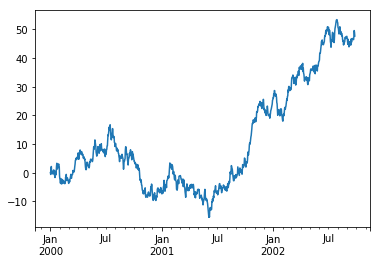

In [287]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [288]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [289]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

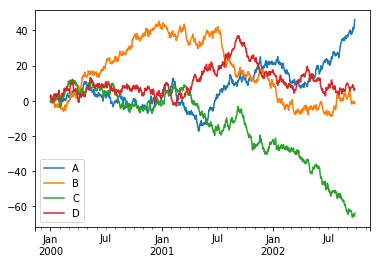

In [290]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [291]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [292]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.088282,2.579709,-0.803675,1.639117
1,2000-01-02,1.589419,2.026121,-0.234691,3.267513
2,2000-01-03,1.210291,1.822541,-0.816372,2.252757
3,2000-01-04,0.561013,0.598600,-0.782289,1.482783
4,2000-01-05,0.794799,-0.957295,-0.451409,2.316312
5,2000-01-06,-1.198936,-0.583239,0.776260,1.106671
6,2000-01-07,0.473636,-0.164220,0.071248,1.050902
7,2000-01-08,1.031963,-0.088214,0.610004,0.130229
8,2000-01-09,1.201324,-1.501929,0.498778,-0.773679
9,2000-01-10,0.465794,-0.265836,1.590088,-0.164541


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [293]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [294]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-0.088282,2.579709,-0.803675,1.639117
2000-01-02,1.589419,2.026121,-0.234691,3.267513
2000-01-03,1.210291,1.822541,-0.816372,2.252757
2000-01-04,0.561013,0.598600,-0.782289,1.482783
2000-01-05,0.794799,-0.957295,-0.451409,2.316312
2000-01-06,-1.198936,-0.583239,0.776260,1.106671
2000-01-07,0.473636,-0.164220,0.071248,1.050902
2000-01-08,1.031963,-0.088214,0.610004,0.130229
2000-01-09,1.201324,-1.501929,0.498778,-0.773679
2000-01-10,0.465794,-0.265836,1.590088,-0.164541


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [295]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [296]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-0.088282,2.579709,-0.803675,1.639117
2000-01-02,1.589419,2.026121,-0.234691,3.267513
2000-01-03,1.210291,1.822541,-0.816372,2.252757
2000-01-04,0.561013,0.598600,-0.782289,1.482783
2000-01-05,0.794799,-0.957295,-0.451409,2.316312
2000-01-06,-1.198936,-0.583239,0.776260,1.106671
2000-01-07,0.473636,-0.164220,0.071248,1.050902
2000-01-08,1.031963,-0.088214,0.610004,0.130229
2000-01-09,1.201324,-1.501929,0.498778,-0.773679
2000-01-10,0.465794,-0.265836,1.590088,-0.164541


### Gotchas
If you are trying an operation and you see an exception like:

In [297]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.